In [1]:
# importing basic libraries
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()

# load datasets
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


Converting train data string labels into numbers and filling Na values of Item_Weight By Mean Values According to Fat_Content.

In [2]:
train['Education'] = le.fit_transform(train['Education'])
train['Education'].value_counts()
train['LoanAmount'] = train.groupby('Education')['LoanAmount'].transform(lambda x: x.fillna(x.mean()))

In [3]:
train['Property_Area'] = le.fit_transform(train['Property_Area'])
train['Self_Employed'] = train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
train['Credit_History'].fillna(1, inplace=True)
train['Self_Employed'] = le.fit_transform(train['Self_Employed'])
train['Loan_Status'] = le.fit_transform(train['Loan_Status'])
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].fillna(360,inplace=True)
train['Loan_Amount_Term'] = le.fit_transform(train['Loan_Amount_Term'])

In [4]:
#Specifyin input features and output features
feat_colums = ['Education', 'Self_Employed', 'ApplicantIncome','CoapplicantIncome','Credit_History','Loan_Amount_Term','Property_Area']
X = train[feat_colums]
y = train.Loan_Status
#Splitting train and test in train dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [5]:
#Creating Tree Object With Entropy Criterias
model = tree.DecisionTreeClassifier(criterion='entropy',max_depth = 5)
#Decision Tree Classifier
model = model.fit(X_train,y_train)

In [6]:
#Predict the response for test dataset
y_pred = model.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy Using Entropy Criterion:",metrics.accuracy_score(y_test, y_pred))

Accuracy Using Entropy Criterion: 0.7967479674796748


C:\Users\Trilo\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


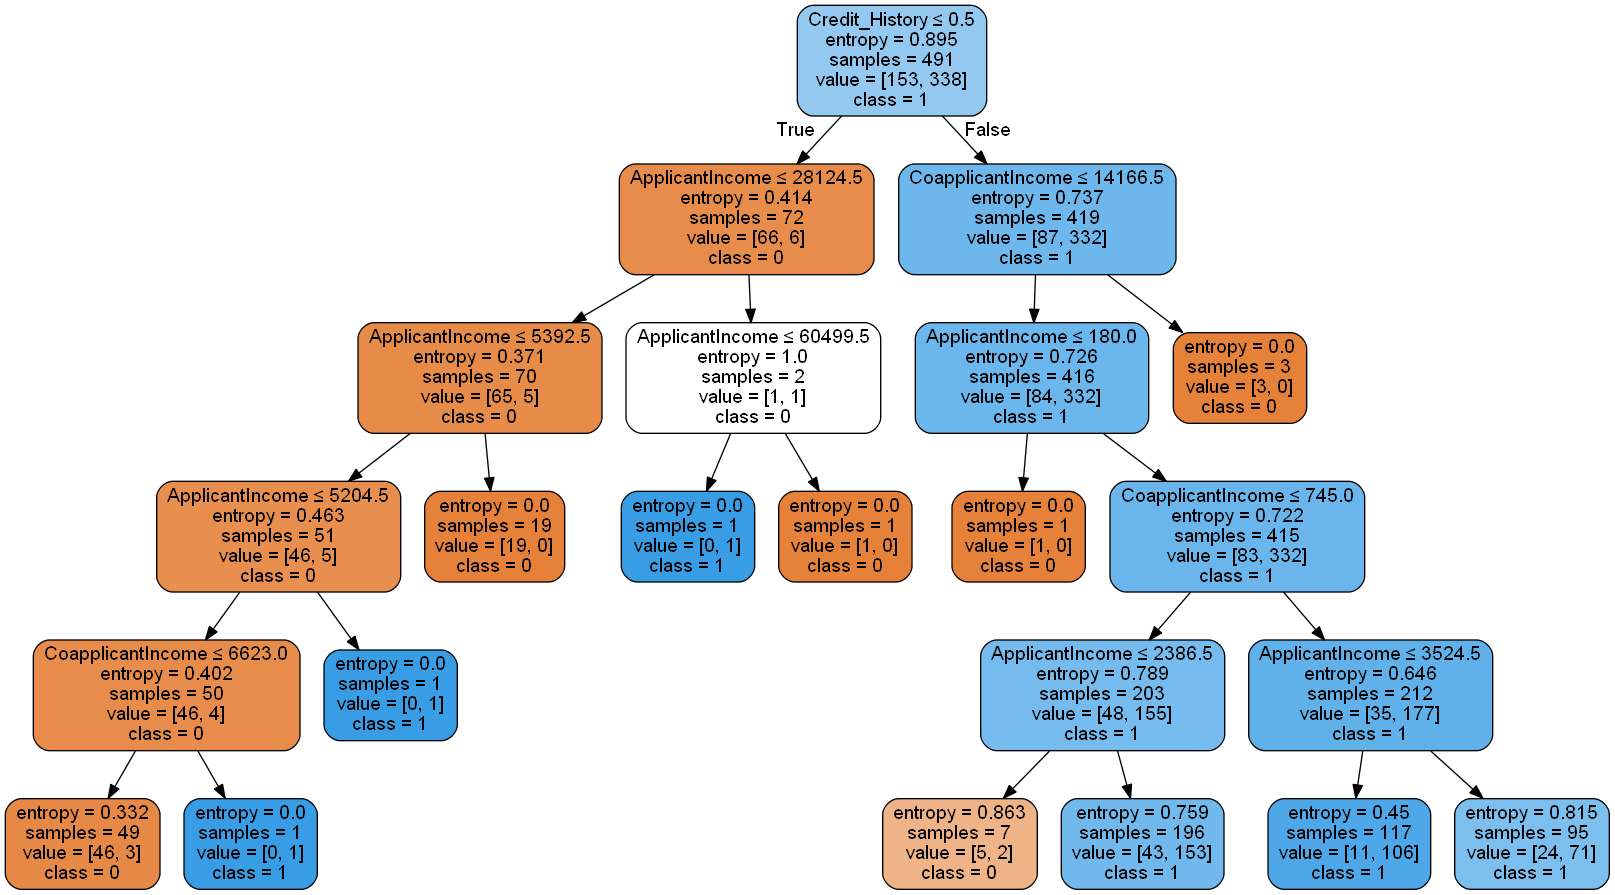

In [7]:
#Plotting The Decision Tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import os
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feat_colums,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('prediction.png')
Image(graph.create_png())

In [8]:
test['Education'] = le.fit_transform(test['Education'])
test['Education'].value_counts()
test['LoanAmount'] = test.groupby('Education')['LoanAmount'].transform(lambda x: x.fillna(x.mean()))

In [9]:
test['Property_Area'] = le.fit_transform(test['Property_Area'])
test['Self_Employed'] = train['Self_Employed'].fillna(test['Self_Employed'].mode()[0],inplace=True)
test['Credit_History'].fillna(1, inplace=True)
test['Self_Employed'] = le.fit_transform(test['Self_Employed'])
feat_colums = ['Education', 'Self_Employed', 'ApplicantIncome','CoapplicantIncome','Credit_History','Property_Area']
X = test[feat_colums]
test['Loan_Status'] = model.predict(X)
test['Loan_Status'].replace([0,1],['No','Yes'],inplace=True)
test[['Loan_ID','Loan_Status']].to_csv("loan_prediction.csv")

ValueError: Number of features of the model must match the input. Model n_features is 7 and input n_features is 6 